In [3]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [4]:
# Import the requests library
import requests

# Import the API key
from config import weather_api_key

In [5]:
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2ce02ec5486fcfb30430ac99466f01ab


In [6]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [8]:
# Use the print() function to display the latitude and longitude combinations
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

11.157140636140909 109.53896439658399
-88.51026572127027 93.78923615373435
15.14242325804733 66.09343373425276
-44.367509527961495 -141.93412628575132
-16.2772680997262 -157.00434723178742
27.829502869163903 -97.2672227885825
11.821121306662164 50.4439777576693
82.21094117021224 -56.54752776930269
39.45617462499388 -43.383412922007295
-80.14966791550836 5.582566909710579
-48.019778124828605 -153.7957554529479
89.98676505492787 -76.78335367435655
59.51220685144989 25.23248993029725
-76.39765959888385 -0.7488203306728565
-5.536538168321968 -23.027736073477115
72.46711240398756 162.85713433628746
75.99168762540106 -165.2725472908275
78.07341021626911 -32.98219522077042
-20.385618641709627 134.22240754786748
9.4695839225419 -33.028448555758416
-27.909596455098658 -71.31797263180229
24.097047303845187 112.90758547733918
-26.738534937679802 65.8687087244125
8.08998824195426 -112.13905105805466
11.298926079779093 -46.377154821602204
74.70692100495285 -154.38001173973296
36.70134391936109 -48.

In [9]:
from citipy import citipy

In [10]:
# Create a list for holding the cities
cities = []

# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

608

In [11]:
# Create an empty list to hold the weather data
city_data = []
# Print the beginning of the logging
print("Beginning Data Retrieval      ")
print("------------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in the list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count += 1

# Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the data to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime("%Y-%m-%d %H:%M:%S")
        # Append the city information into city_data list
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
        
# If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data loading is complete
print("-----------------------------")
print("Data Retrival Complete.      ")
print("-----------------------------")
    
# Create an empty list to hold the weather data
#for i in range(len(cities)):
    
    # Group cities in sets of 50 for logging purposes
    #if (i % 50 == 0 and i >= 50):
        #set_count += 1
        #record_count = 1
        #time.sleep(60)
        
    # Create endpoint URL wiht each city
    #city_url = url + "&q=" + cities[i]
    
    

Beginning Data Retrieval      
------------------------------
Processing Record 1 of Set 1 | phan rang
City not found. Skipping...
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | veraval
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | faanui
Processing Record 6 of Set 1 | ingleside
Processing Record 7 of Set 1 | bereda
Processing Record 8 of Set 1 | upernavik
Processing Record 9 of Set 1 | torbay
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | qaanaaq
Processing Record 12 of Set 1 | valkla
Processing Record 13 of Set 1 | georgetown
Processing Record 14 of Set 1 | cherskiy
Processing Record 15 of Set 1 | barrow
Processing Record 16 of Set 1 | tasiilaq
Processing Record 17 of Set 1 | alice springs
Processing Record 18 of Set 1 | sao filipe
Processing Record 19 of Set 1 | vallenar
Processing Record 20 of Set 1 | qingyuan
Processing Record 21 of Set 1 | bambous virieux
Processing Record 22 of Set 1 | san patricio
Processin

Processing Record 32 of Set 4 | sao joao da barra
Processing Record 33 of Set 4 | carnarvon
Processing Record 34 of Set 4 | karaul
City not found. Skipping...
Processing Record 35 of Set 4 | shelburne
Processing Record 36 of Set 4 | pauini
Processing Record 37 of Set 4 | vaini
Processing Record 38 of Set 4 | ilulissat
Processing Record 39 of Set 4 | imbituba
Processing Record 40 of Set 4 | dukat
Processing Record 41 of Set 4 | petilia policastro
Processing Record 42 of Set 4 | saint-pierre
Processing Record 43 of Set 4 | topolobampo
Processing Record 44 of Set 4 | yambio
Processing Record 45 of Set 4 | bonavista
Processing Record 46 of Set 4 | bathsheba
Processing Record 47 of Set 4 | guadalajara
Processing Record 48 of Set 4 | kaitangata
Processing Record 49 of Set 4 | victoria
Processing Record 50 of Set 4 | dikson
Processing Record 1 of Set 5 | broome
Processing Record 2 of Set 5 | aklavik
Processing Record 3 of Set 5 | ossora
Processing Record 4 of Set 5 | avera
Processing Record 5

City not found. Skipping...
Processing Record 23 of Set 8 | grand centre
City not found. Skipping...
Processing Record 24 of Set 8 | mnogovershinnyy
Processing Record 25 of Set 8 | ipoh
Processing Record 26 of Set 8 | pevek
Processing Record 27 of Set 8 | zanatepec
City not found. Skipping...
Processing Record 28 of Set 8 | kalaleh
Processing Record 29 of Set 8 | axim
Processing Record 30 of Set 8 | udachnyy
Processing Record 31 of Set 8 | nishihara
Processing Record 32 of Set 8 | changde
Processing Record 33 of Set 8 | puerto escondido
Processing Record 34 of Set 8 | quepos
Processing Record 35 of Set 8 | quirinopolis
Processing Record 36 of Set 8 | mount gambier
Processing Record 37 of Set 8 | borger
Processing Record 38 of Set 8 | bimbo
Processing Record 39 of Set 8 | ambodifototra
City not found. Skipping...
Processing Record 40 of Set 8 | kuche
City not found. Skipping...
Processing Record 41 of Set 8 | kodinsk
Processing Record 42 of Set 8 | lincoln
Processing Record 43 of Set 8 

Processing Record 11 of Set 12 | walvis bay
Processing Record 12 of Set 12 | arys
Processing Record 13 of Set 12 | miandoab
Processing Record 14 of Set 12 | misratah
Processing Record 15 of Set 12 | kenai
Processing Record 16 of Set 12 | svetlyy
Processing Record 17 of Set 12 | andreyevo
Processing Record 18 of Set 12 | mullaitivu
City not found. Skipping...
Processing Record 19 of Set 12 | cockburn town
Processing Record 20 of Set 12 | rundu
Processing Record 21 of Set 12 | guiglo
Processing Record 22 of Set 12 | guelengdeng
City not found. Skipping...
Processing Record 23 of Set 12 | biltine
Processing Record 24 of Set 12 | vilyuysk
Processing Record 25 of Set 12 | nabire
Processing Record 26 of Set 12 | roma
Processing Record 27 of Set 12 | whitewater
Processing Record 28 of Set 12 | saint-francois
Processing Record 29 of Set 12 | kudahuvadhoo
Processing Record 30 of Set 12 | brigantine
Processing Record 31 of Set 12 | jizan
Processing Record 32 of Set 12 | lardos
Processing Record 

In [12]:
len(city_data)

553

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,48.67,71,100,3.83,US,2022-11-27 18:40:06
1,Veraval,20.9000,70.3667,73.27,49,0,5.08,IN,2022-11-27 18:40:12
2,Mataura,-46.1927,168.8643,45.05,86,95,2.24,NZ,2022-11-27 18:40:13
3,Faanui,-16.4833,-151.7500,78.84,75,18,14.74,PF,2022-11-27 18:40:13
4,Ingleside,27.8778,-97.2117,77.02,60,0,5.75,US,2022-11-27 18:40:14
5,Bereda,43.2686,-7.5406,48.42,100,82,3.60,ES,2022-11-27 18:40:15
6,Upernavik,72.7868,-56.1549,11.21,80,100,4.83,GL,2022-11-27 18:40:15
7,Torbay,47.6666,-52.7314,43.39,96,100,18.41,CA,2022-11-27 18:40:16
8,Hermanus,-34.4187,19.2345,65.80,75,0,17.94,ZA,2022-11-27 18:40:17
9,Qaanaaq,77.4840,-69.3632,-10.01,71,15,6.85,GL,2022-11-27 18:40:17


In [14]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

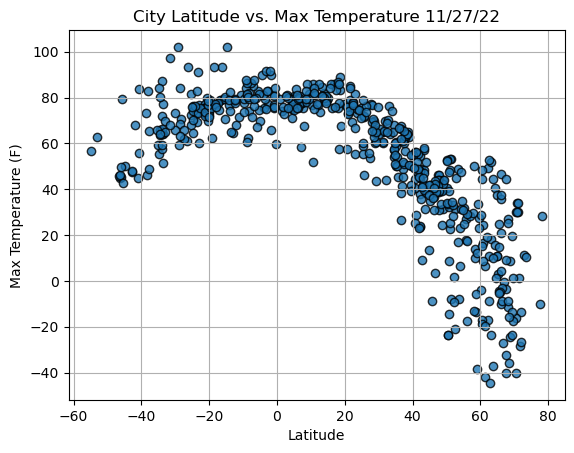

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graphe properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/fig1.png")

# Show plot
plt.show()

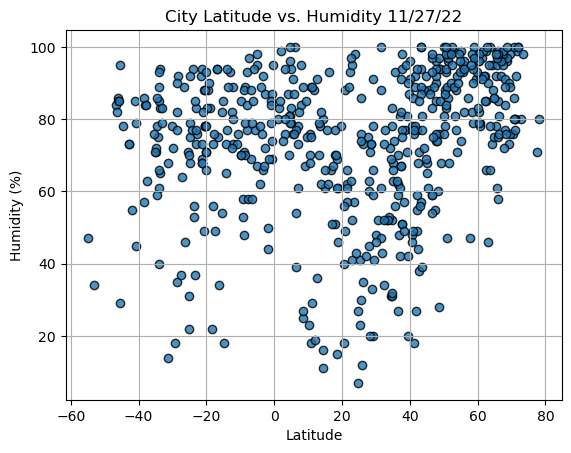

In [17]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graphe properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/fig2.png")

# Show plot
plt.show()

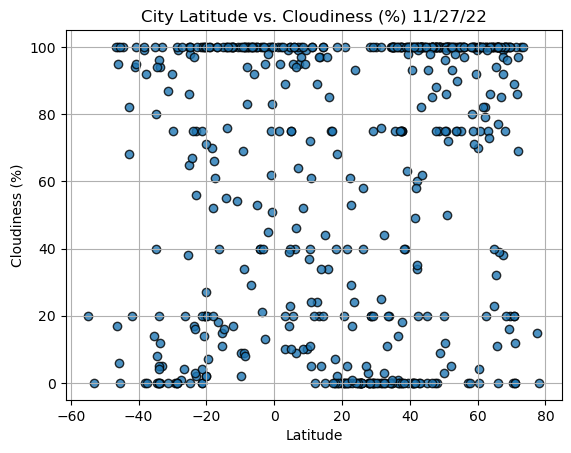

In [18]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graphe properties
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/fig3.png")

# Show plot
plt.show()

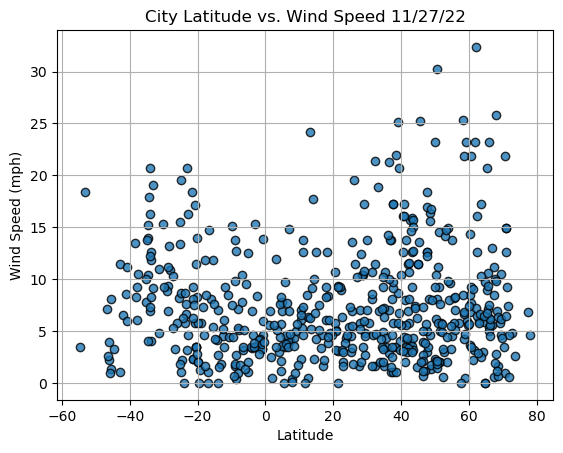

In [19]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graphe properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/fig4.png")

# Show plot
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    # Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()

In [21]:
index13 = city_data_df.loc[13]
index13

City                       Barrow
Lat                       71.2906
Lng                     -156.7887
Max Temp                     1.42
Humidity                       92
Cloudiness                    100
Wind Speed                   9.22
Country                        US
Date          2022-11-27 18:40:20
Name: 13, dtype: object

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,48.67,71,100,3.83,US,2022-11-27 18:40:06
1,Veraval,20.9000,70.3667,73.27,49,0,5.08,IN,2022-11-27 18:40:12
4,Ingleside,27.8778,-97.2117,77.02,60,0,5.75,US,2022-11-27 18:40:14
5,Bereda,43.2686,-7.5406,48.42,100,82,3.60,ES,2022-11-27 18:40:15
6,Upernavik,72.7868,-56.1549,11.21,80,100,4.83,GL,2022-11-27 18:40:15


In [23]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

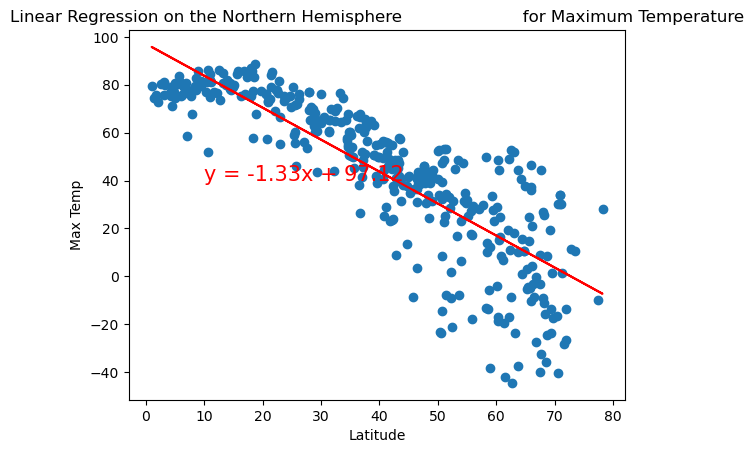

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Northern Hemisphere \
                      for Maximum Temperature", "Max Temp", (10,40))

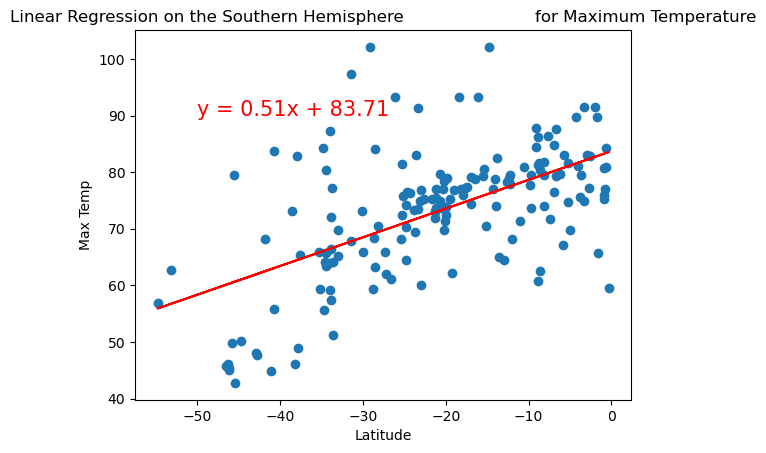

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

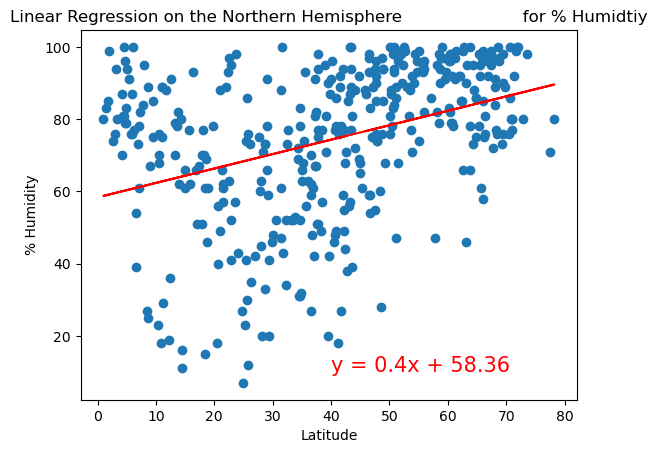

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Northern Hemisphere \
                      for % Humidtiy", "% Humidity", (40,10))

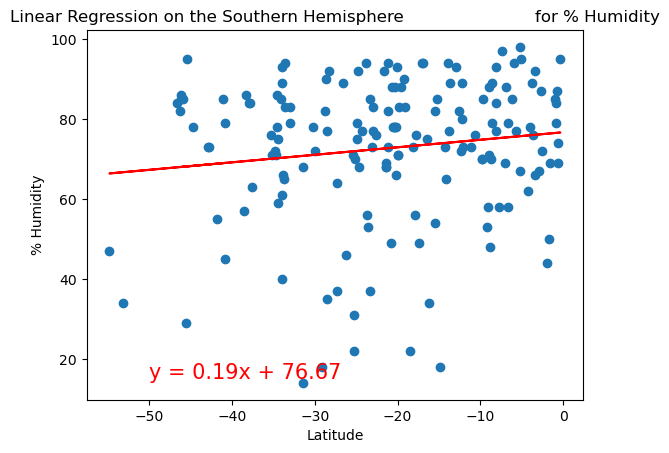

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

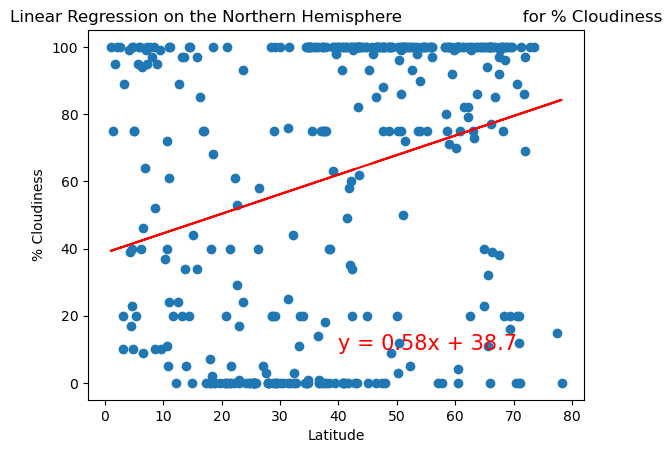

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Northern Hemisphere \
                      for % Cloudiness", "% Cloudiness", (40,10))

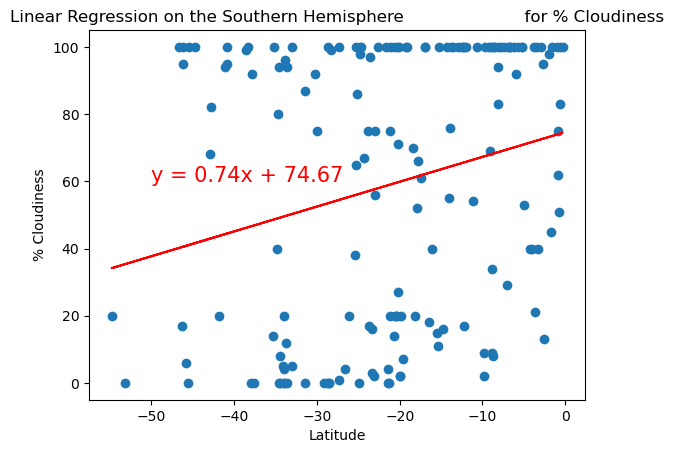

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere \
                      for % Cloudiness", "% Cloudiness", (-50,60))

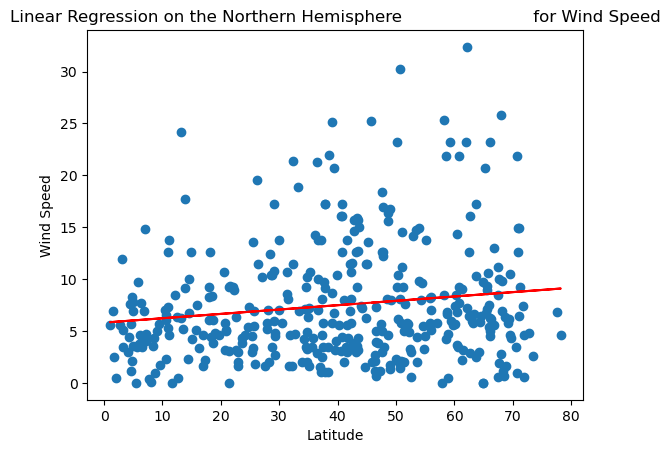

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

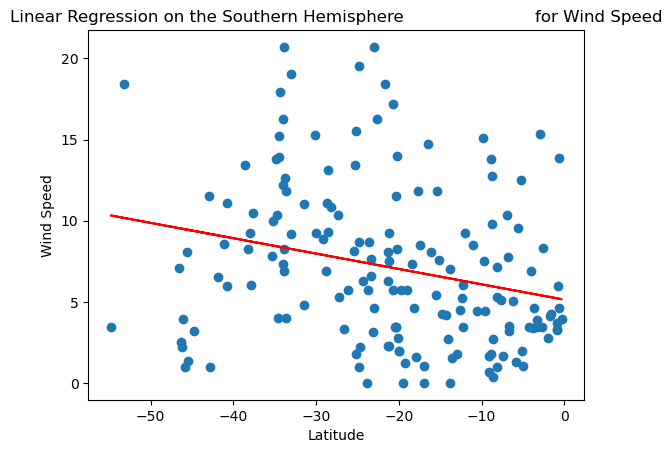

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))